In [1]:
import numpy as np
import cv2

In [2]:
img=cv2.imread("C:\\Users\\Vatsal\\Desktop\\Internity Foundation\\logo.png")

In [3]:
Z=img.reshape((-1,3))

In [4]:
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
df=pd.read_csv('C:\\Users\\Vatsal\\Desktop\\Unused\\heart.csv')

In [15]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
df=df.loc[:,['trestbps','thalach']]
df.tail()

,trestbps,thalach
298,140,123
299,110,132
300,144,141
301,130,115
302,130,174


In [17]:
df1=df.values

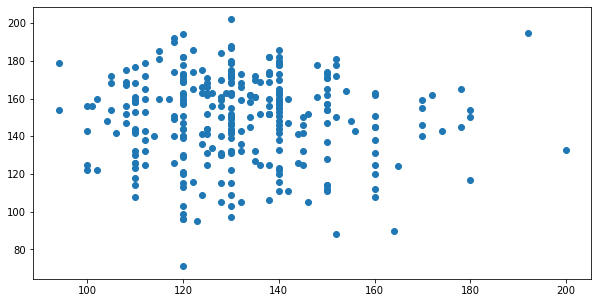

In [22]:
ax,fig=plt.subplots(figsize=(10,5))
plt.scatter(df1[:,0], df1[:, 1])
plt.show()

In [68]:
def cost(df1, centroids, cluster):
  dis = 0
  for i, val in enumerate(X):
      dis += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return d

In [72]:
def KMC(df1, k):
  
  diff = 1
  cluster = np.zeros(df1.shape[0])

  centroids = df.sample(n=k).values

  while diff:

    
    for i, row in enumerate(df1):

      dist = float('inf')
      #Point's distance
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

         
        if dist > d:
          dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(df1).groupby(by=cluster).mean().values

    #When Centroids Coincide 
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
return centroids, cluster  

In [79]:
k = 3
centroids, cluster = KMC(df1,k)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


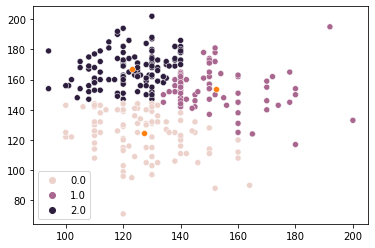

In [80]:
sns.scatterplot(df1[:,0], df1[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1])
plt.show()